In [26]:
import os,sys,math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
%matplotlib inline
e=math.exp

plt.style.use("fivethirtyeight")

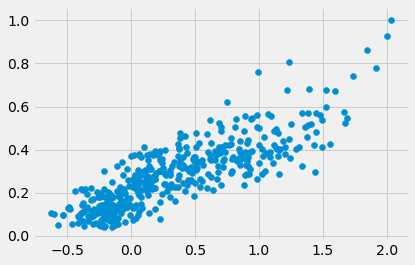

In [99]:
fluTrain=pd.read_csv('data/FluTrain.csv')
fluTest=pd.read_csv('data/FluTest.csv')

fluTest['ILI']=fluTest.ILI.apply(lambda x: math.log(x))
fluTrain['ILI']=fluTrain.ILI.apply(lambda x: math.log(x))

plt.scatter(fluTrain['ILI'],fluTrain['Queries'])

In [127]:
xTrain=fluTrain['Queries']
yTrain=fluTrain['ILI']
xTrain=sm.add_constant(xTrain)

xTest=fluTest['Queries']
yTest=fluTest['ILI']
xTest=sm.add_constant(xTest)
model=sm.OLS(yTrain,xTrain).fit()

model.summary()

yPred=model.predict(xTest)
yPred=yPred.apply(lambda x: e(x))

df=pd.DataFrame({"Week":fluTest['Week'],'yPred':yPred})
pred=df[df.Week.str.contains('2012-03-11')]

actual=fluTest[fluTest.Week.str.contains('2012-03-11')]

(e(actual['ILI'])-pred['yPred'])/e(actual['ILI'])


10    0.046238
Name: yPred, dtype: float64

In [135]:
actualILI=yTest.apply(lambda x: e(x))

math.sqrt(mse(actualILI,yPred))

0.7490645271019652